# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую диеятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма и т.п.).

Апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/IT Data analytic/Data Jupyter/03 Исследовательский анализ данных/real_estate_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [4]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеины в одну строку вместо того, чтобы разбиться по колонкам. 

Прочитаем файл `/datasets/real_estate_data.csv`, указав в качестве разделителя - `\t`

In [5]:
df = pd.read_csv('C:/IT Data analytic/Data Jupyter/03 Исследовательский анализ данных/real_estate_data.csv', sep='\t')

In [6]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях колонок присутствует нарушение стиля.

Столбцы включают в себя все типы данных.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

In [9]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Требуется проверка аномальных данных в столбцах:
* rooms(min),
* ceiling_height(min),
* living_area(min),
* kitchen_area(min),
* airports_nearest(min),
* cityCenters_nearest(min),
* parks_nearest(min),
* ponds_nearest(min).	

In [10]:
'Инофрмация о пропусках'
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
'Инофрмация о долях пропущенных значений'
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

**Выводы**

В каждой строке таблицы — данные о продаже квартир.

Предварительно:

В колонке `first_day_exposition` требуется замена типа данных с текстового на временной.

Требуется изменить наименование столбца `cityCenters_nearest` - нарушение стиля.

В 14 колонках встречаются пропуски - необходимо обработать.

Требуется проверка аномальных данных в столбцах.

Требуется устранить проблемы в данных.

## Предобработка данных

### Анализ пропусков

In [12]:
'Инофрмация о пропусках'
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проведем анализ пропусков в столбцах.

In [13]:
def display_pc_skips(column):
    return display('Доля пропущенных значений {:.1%}'.format(df[column].isna().sum()/df.shape[0])+' в столбце '+column)

In [14]:
columns = list(df)
for i in columns:
    display_pc_skips(i)

'Доля пропущенных значений 0.0% в столбце total_images'

'Доля пропущенных значений 0.0% в столбце last_price'

'Доля пропущенных значений 0.0% в столбце total_area'

'Доля пропущенных значений 0.0% в столбце first_day_exposition'

'Доля пропущенных значений 0.0% в столбце rooms'

'Доля пропущенных значений 38.8% в столбце ceiling_height'

'Доля пропущенных значений 0.4% в столбце floors_total'

'Доля пропущенных значений 8.0% в столбце living_area'

'Доля пропущенных значений 0.0% в столбце floor'

'Доля пропущенных значений 88.3% в столбце is_apartment'

'Доля пропущенных значений 0.0% в столбце studio'

'Доля пропущенных значений 0.0% в столбце open_plan'

'Доля пропущенных значений 9.6% в столбце kitchen_area'

'Доля пропущенных значений 48.6% в столбце balcony'

'Доля пропущенных значений 0.2% в столбце locality_name'

'Доля пропущенных значений 23.4% в столбце airports_nearest'

'Доля пропущенных значений 23.3% в столбце cityCenters_nearest'

'Доля пропущенных значений 23.3% в столбце parks_around3000'

'Доля пропущенных значений 65.9% в столбце parks_nearest'

'Доля пропущенных значений 23.3% в столбце ponds_around3000'

'Доля пропущенных значений 61.6% в столбце ponds_nearest'

'Доля пропущенных значений 13.4% в столбце days_exposition'

#### Удаление пропусков в столбце floors_total

Удаляем данные с незначительным количеством пропусков.

In [15]:
display(f"Количество пропущенных значений: {df['floors_total'].isna().sum()}")
display_pc_skips('floors_total')

'Количество пропущенных значений: 86'

'Доля пропущенных значений 0.4% в столбце floors_total'

In [16]:
df.dropna(subset=['floors_total'], inplace=True)

In [17]:
display(f"Количество пропущенных значений: {df['floors_total'].isna().sum()}")
display_pc_skips('floors_total')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце floors_total'

#### Удаление пропусков в столбце locality_name

Удаляем данные с незначительным количеством пропусков.

In [18]:
display(f"Количество пропущенных значений: {df['locality_name'].isna().sum()}")
display_pc_skips('locality_name')

'Количество пропущенных значений: 48'

'Доля пропущенных значений 0.2% в столбце locality_name'

In [19]:
df.dropna(subset=['locality_name'], inplace=True)

In [20]:
display(f"Количество пропущенных значений: {df['locality_name'].isna().sum()}")
display_pc_skips('locality_name')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце locality_name'

#### Заполнение пропусков в столбце ceiling_height

In [21]:
display(f"Количество пропущенных значений: {df['ceiling_height'].isna().sum()}")
display_pc_skips('ceiling_height')

'Количество пропущенных значений: 9084'

'Доля пропущенных значений 38.5% в столбце ceiling_height'

Пустые значения высоты потолков меняем на `медианное` значение высоты потолков для каждого населенного пункта. 

In [22]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))

In [23]:
display(f"Количество пропущенных значений: {df['ceiling_height'].isna().sum()}")
display_pc_skips('ceiling_height')

'Количество пропущенных значений: 120'

'Доля пропущенных значений 0.5% в столбце ceiling_height'

Причина оставшихся пустых значений - отсутствие базы для расчета.

In [24]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
110,6,3850000.0,72.30,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,...,23.6,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2250000.0,73.00,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,...,8.4,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,...,NaN,NaN,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,...,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,14,2050000.0,54.00,2019-04-17T00:00:00,2,NaN,5.0,32.0,4,NaN,...,9.0,2.0,посёлок Перово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22935,8,799000.0,47.20,2018-06-16T00:00:00,2,NaN,5.0,30.6,3,NaN,...,6.3,1.0,поселок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,NaN,5.0,28.4,2,NaN,...,8.8,NaN,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,NaN,2.0,28.0,1,NaN,...,9.0,NaN,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0


In [25]:
df[df.locality_name == 'деревня Заклинье']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
168,9,2250000.0,73.0,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,...,8.4,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
9137,5,1450000.0,44.3,2018-12-07T00:00:00,2,NaN,5.0,31.2,5,False,...,5.4,1.0,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18038,7,1700000.0,62.0,2018-02-14T00:00:00,3,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Оставшиеся пустые значения высоты потолков меняем на медианное значение расчитанное по всей базе данных.

In [26]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

In [27]:
display(f"Количество пропущенных значений: {df['ceiling_height'].isna().sum()}")
display_pc_skips('ceiling_height')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце ceiling_height'

#### Заполнение пропусков в столбце living_area

In [28]:
display(f"Количество пропущенных значений: {df['living_area'].isna().sum()}")
display_pc_skips('living_area')

'Количество пропущенных значений: 1865'

'Доля пропущенных значений 7.9% в столбце living_area'

Пустые значения меняем на `медианное` значение. 

In [29]:
df['living_area'] = df['living_area'].fillna(df.groupby('total_area')['living_area'].transform('median'))

In [30]:
display(f"Количество пропущенных значений: {df['living_area'].isna().sum()}")
display_pc_skips('living_area')

'Количество пропущенных значений: 133'

'Доля пропущенных значений 0.6% в столбце living_area'

Причина оставшихся пустых значений - отсутствие базы для расчета. Оставшиеся пустые значения заполняем произведением total_area конкретного объекта на коэфицент от медианных значений (total_area, living_area) расчитанных по всей базе данных.

In [31]:
ratio_living_area = df['living_area'].median()/df['total_area'].median()
ratio_living_area

0.5769230769230769

In [32]:
df['living_area'] = df['living_area'].fillna(ratio_living_area * df['total_area'])

In [33]:
display(f"Количество пропущенных значений: {df['living_area'].isna().sum()}")
display_pc_skips('living_area')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце living_area'

#### Заполнение пропусков в столбце is_apartment

In [34]:
display(f"Количество пропущенных значений: {df['is_apartment'].isna().sum()}")
display_pc_skips('is_apartment')

'Количество пропущенных значений: 20805'

'Доля пропущенных значений 88.3% в столбце is_apartment'

In [35]:
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Логично предположить что значение True указывает на то что это апартаменты. Пустые значения меняем на False.

In [36]:
df['is_apartment'].fillna(False, inplace=True)

In [37]:
df['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [38]:
display(f"Количество пропущенных значений: {df['is_apartment'].isna().sum()}")
display_pc_skips('is_apartment')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце is_apartment'

#### Заполнение пропусков в столбце kitchen_area

In [39]:
display(f"Количество пропущенных значений: {df['kitchen_area'].isna().sum()}")
display_pc_skips('kitchen_area')

'Количество пропущенных значений: 2222'

'Доля пропущенных значений 9.4% в столбце kitchen_area'

Пустые значения меняем на `медианное` значение. 

In [40]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('median'))

In [41]:
display(f"Количество пропущенных значений: {df['kitchen_area'].isna().sum()}")
display_pc_skips('kitchen_area')

'Количество пропущенных значений: 185'

'Доля пропущенных значений 0.8% в столбце kitchen_area'

Причина оставшихся пустых значений - отсутствие базы для расчета. Оставшиеся пустые значения заполняем произведением total_area конкретного объекта на коэфицент от медианных значений (total_area, kitchen_area) расчитанных по всей базе данных.

In [42]:
ratio_kitchen_area = df['kitchen_area'].median()/df['total_area'].median()
ratio_kitchen_area

0.17307692307692307

In [43]:
df['kitchen_area'] = df['kitchen_area'].fillna(ratio_kitchen_area * df['total_area'])

In [44]:
display(f"Количество пропущенных значений: {df['kitchen_area'].isna().sum()}")
display_pc_skips('kitchen_area')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце kitchen_area'

#### Заполнение пропусков в столбце balcony

In [45]:
display(f"Количество пропущенных значений: {df['balcony'].isna().sum()}")
display_pc_skips('balcony')

'Количество пропущенных значений: 11475'

'Доля пропущенных значений 48.7% в столбце balcony'

Логично предположитьб что отсутствие информации о количестве балконов свидетельствует о том, что число балконов равно нулю. Заменим вещественный тип данных на целочисленный.

In [46]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

In [47]:
df['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23565, dtype: int32

In [48]:
display(f"Количество пропущенных значений: {df['balcony'].isna().sum()}")
display_pc_skips('balcony')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце balcony'

#### Заполнение пропусков в столбце airports_nearest

In [49]:
display(f"Количество пропущенных значений: {df['airports_nearest'].isna().sum()}")
display_pc_skips('airports_nearest')

'Количество пропущенных значений: 5524'

'Доля пропущенных значений 23.4% в столбце airports_nearest'

Пустые значения меняем на `медианное` значение. 

In [50]:
df[df['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.50,2,False,...,7.20,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,...,8.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Без координат невозможно определить корректное расстояние - оставляем без изменений.

#### Заполнение пропусков в столбце cityCenters_nearest

In [51]:
display(f"Количество пропущенных значений: {df['cityCenters_nearest'].isna().sum()}")
display_pc_skips('cityCenters_nearest')

'Количество пропущенных значений: 5501'

'Доля пропущенных значений 23.3% в столбце cityCenters_nearest'

In [52]:
df[df['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.50,2,False,...,7.20,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.70,1,False,...,8.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Без координат невозможно определить корректное расстояние - оставляем без изменений.

#### Заполнение пропусков в столбце parks_around3000

In [53]:
display(f"Количество пропущенных значений: {df['parks_around3000'].isna().sum()}")
display_pc_skips('parks_around3000')

'Количество пропущенных значений: 5500'

'Доля пропущенных значений 23.3% в столбце parks_around3000'

Логично предположить что отсутствие информации о количестве парков свидетельствует о том, что число парков равно нулю, в тоже время если присутствует информация о расстоянии до парка то он должен быть. Заменим вещественный тип данных на целочисленный.


In [54]:
error = pd.DataFrame()
error['parks_around3000'] = df['parks_around3000']
error['parks_nearest'] = df['parks_nearest']
error['parks_nearest'] = error['parks_nearest'].fillna(0)
error['new'] = error['parks_around3000'] == error['parks_nearest']
error.loc[error['new'] != False]

,parks_around3000,parks_nearest,new
1,0.0,0.0,True
6,0.0,0.0,True
7,0.0,0.0,True
9,0.0,0.0,True
11,0.0,0.0,True
...,...,...,...
23684,0.0,0.0,True
23685,0.0,0.0,True
23687,0.0,0.0,True
23688,0.0,0.0,True


Информации о расстоянии до парка нет.

In [55]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)

In [56]:
display(f"Количество пропущенных значений: {df['parks_around3000'].isna().sum()}")
display_pc_skips('parks_around3000')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце parks_around3000'

#### Заполнение пропусков в столбце parks_nearest

In [57]:
display(f"Количество пропущенных значений: {df['parks_nearest'].isna().sum()}")
display_pc_skips('parks_nearest')

'Количество пропущенных значений: 15535'

'Доля пропущенных значений 65.9% в столбце parks_nearest'

In [58]:
df[df['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.615,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.600,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.640,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.700,24.0,44.30,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.700,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.750,25.0,40.30,7,False,...,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.600,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.500,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.700,3.0,29.70,1,False,...,8.00,0,село Рождествено,NaN,NaN,0,NaN,NaN,NaN,NaN


Без координат невозможно определить корректное расстояние - оставляем без изменений.

#### Заполнение пропусков в столбце ponds_around3000

In [59]:
display(f"Количество пропущенных значений: {df['ponds_around3000'].isna().sum()}")
display_pc_skips('ponds_around3000')

'Количество пропущенных значений: 5500'

'Доля пропущенных значений 23.3% в столбце ponds_around3000'

Логично предположить что отсутствие информации о количестве  водоёмов свидетельствует о том, что число водоёмов равно нулю, в тоже время если присутствует информация о расстоянии до водоёма то он должен быть. Заменим вещественный тип данных на целочисленный.

In [60]:
error1 = pd.DataFrame()
error1['ponds_around3000'] = df['ponds_around3000']
error1['ponds_nearest'] = df['ponds_nearest']
error1['ponds_nearest'] = error1['ponds_nearest'].fillna(0)
error1['new'] = error1['ponds_around3000'] == error1['ponds_nearest']
error1.loc[error1['new'] != False]

,ponds_around3000,ponds_nearest,new
1,0.0,0.0,True
6,0.0,0.0,True
7,0.0,0.0,True
9,0.0,0.0,True
11,0.0,0.0,True
...,...,...,...
23684,0.0,0.0,True
23685,0.0,0.0,True
23687,0.0,0.0,True
23688,0.0,0.0,True


In [61]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

In [62]:
display(f"Количество пропущенных значений: {df['ponds_around3000'].isna().sum()}")
display_pc_skips('ponds_around3000')

'Количество пропущенных значений: 0'

'Доля пропущенных значений 0.0% в столбце ponds_around3000'

#### Заполнение пропусков в столбце ponds_nearest

In [63]:
display(f"Количество пропущенных значений: {df['ponds_nearest'].isna().sum()}")
display_pc_skips('ponds_nearest')

'Количество пропущенных значений: 14529'

'Доля пропущенных значений 61.7% в столбце ponds_nearest'

In [64]:
df[df['ponds_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.615,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.600,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.640,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.700,24.0,44.30,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.700,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.700,5.0,31.00,2,False,...,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.600,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,0,NaN,0,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.500,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.700,3.0,29.70,1,False,...,8.00,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Без координат невозможно определить корректное расстояние - оставляем без изменений.

#### Заполнение пропусков в столбце days_exposition

In [65]:
display(f"Количество пропущенных значений: {df['days_exposition'].isna().sum()}")
display_pc_skips('days_exposition')

'Количество пропущенных значений: 3171'

'Доля пропущенных значений 13.5% в столбце days_exposition'

In [66]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,44.3,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.70,22.0,18.0,3,False,...,10.00,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,...,7.00,0,Санкт-Петербург,30011.0,12872.0,0,NaN,0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,...,8.30,2,Санкт-Петербург,15114.0,12702.0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.60,0,Санкт-Петербург,11827.0,11459.0,0,NaN,0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.60,1,Ломоносов,48393.0,51818.0,0,NaN,0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.7,1,False,...,8.00,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN


Без дат невозможно определить корректное значение - оставляем без изменений.

#### Результаты анализа пропусков

In [67]:
'Инофрмация о пропусках'
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Проверка данных на аномалии и исправления

In [68]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.733740,10.675875,34.632505,5.878124,10.451372,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.012203,6.594823,22.474067,4.871485,5.899557,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.800000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Проведем анализ следующих данных:**
- количество комнат - min 0
- высота потолков - min 1, max 100
- жилая площадь - min 2
- площадь кухни - min 1.3

#### Проверка данных на аномалии и исправления rooms

In [69]:
df_room = df.query('rooms == 0')
df_room

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.700,24.0,15.50,2,False,...,5.500000,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.750,14.0,17.00,1,False,...,5.000000,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.700,17.0,24.75,4,False,...,4.692115,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.640,26.0,24.30,19,False,...,8.700000,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.615,10.0,17.00,7,False,...,5.000000,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.700,25.0,18.00,16,False,...,5.000000,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.700,24.0,18.00,4,False,...,4.794231,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.700,19.0,17.38,8,False,...,5.000000,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.560,9.0,18.00,8,False,...,6.550000,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


In [70]:
df_room['studio']

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 194, dtype: bool

In [71]:
df_room['total_area'].unique()

array([ 27.  ,  25.  ,  27.11,  34.4 ,  24.1 ,  17.  ,  26.1 ,  35.  ,
        23.  ,  29.  ,  32.  ,  26.  ,  31.  ,  22.  ,  30.  ,  23.98,
        27.55,  27.1 ,  28.4 ,  26.49,  28.9 ,  24.  ,  73.6 ,  21.4 ,
        29.3 ,  28.  ,  20.  ,  19.5 ,  27.81,  26.8 ,  32.3 ,  42.63,
        29.2 ,  27.3 ,  21.3 ,  19.  ,  18.8 ,  15.5 ,  38.3 ,  16.  ,
        23.4 ,  27.56,  24.8 ,  28.3 ,  23.7 ,  44.2 ,  24.75,  20.5 ,
        29.1 ,  26.7 ,  25.27,  27.32,  23.06,  23.5 ,  32.4 ,  21.  ,
        24.2 ,  18.  ,  24.9 ,  58.4 ,  28.2 ,  24.05,  24.4 ,  25.2 ,
        43.3 ,  27.4 ,  23.3 ,  32.2 ,  32.03,  25.7 ,  42.1 ,  22.3 ,
        28.01,  32.8 ,  26.23,  25.3 ,  28.05,  31.1 ,  22.5 ,  25.9 ,
        32.5 ,  23.8 , 371.  ,  24.6 ,  30.5 ,  25.41,  98.4 ,  23.6 ,
        22.2 ,  27.5 ,  28.16,  27.6 ,  71.  ,  28.5 ,  24.5 ,  22.7 ,
        34.  ,  30.1 ,  27.7 ,  26.05,  23.39])

Объекты могут являются как студиями так и однокомнатными квартирами. Присваиваем нулевым значениям 1 комнату.

In [72]:
df['rooms'] = df['rooms'].replace(0, 1)

In [73]:
df['rooms'].describe()

count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

#### Проверка данных на аномалии и исправления ceiling_height

Высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м. - СНиП 31-01-2003 Здания жилые многоквартирные

In [74]:
df_ceiling_height = df.query('ceiling_height <= 2.1')
df_ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.50,6,False,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.00,4,False,...,6.00,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.60,9,False,...,8.80,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.50,1,False,...,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,17.15,5,False,...,8.50,0,Луга,NaN,NaN,0,NaN,0,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.20,12,False,...,10.10,0,посёлок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.90,2,False,...,12.00,0,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.00,5,False,...,6.00,0,Выборг,NaN,NaN,0,NaN,0,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.40,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.00,1,False,...,6.00,0,Выборг,NaN,NaN,0,NaN,0,NaN,282.0


Высота потолков на 14 объектах ниже нормы 2.1 - присваиваем медианное значение рассчитанное по всей базе данных.

In [75]:
df.ceiling_height.median()

2.7

In [76]:
df['ceiling_height'].where(~(df.ceiling_height <= 2.1), other=df.ceiling_height.median(), inplace=True)

Высота потолков в сталинских домах – от 3.20 м. до 4 м.

Отдельная категория – двухуровневые квартиры/апартаменты. В просторных помещениях потолок поднимают до 5 м, что позволяет делить пространство на две полноценные зоны. 

In [77]:
df_ceiling_height = df.query('ceiling_height > 5')
df_ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
313,1,2450000.0,49.0,2016-03-09T00:00:00,3,13.85,5.0,34.000000,2,False,...,5.500000,1,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,189.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.000000,2,False,...,7.800000,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.500000,7,False,...,21.100000,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.000000,3,False,...,63.000000,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,230.192308,6,False,...,69.057692,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
2158,15,1500000.0,42.0,2017-12-23T00:00:00,2,27.00,2.0,29.000000,2,False,...,5.500000,0,деревня Мины,NaN,NaN,0,NaN,0,NaN,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.000000,2,False,...,8.000000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5.0,15.300000,2,False,...,7.300000,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.000000,2,False,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,1,27.00,25.0,17.000000,17,False,...,5.000000,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0


Высота потолков на 40 объектах выше 5 м. - пока оствим без изменений.

In [78]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.734243
std          1.011946
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

#### Проверка данных на аномалии и исправления living_area

В Санкт-Петербурге действуют следующие учетные нормы:
- 9 м2 общей площади жилого помещения для проживающих в отдельных квартирах и жилых домах;
- 15 м2 общей площади жилого помещения для проживающих в коммунальных квартирах.

Для расчета используем 9 м2.

In [79]:
ratio_living_area = df['living_area'].median()/df['total_area'].median()
ratio_living_area

0.5769230769230769

In [80]:
living_area_min = 9*ratio_living_area
living_area_min

5.192307692307692

In [81]:
df_cliving_area = df.query('living_area <= @living_area_min')
df_cliving_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.7,17.0,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,1,2.7,25.0,5.0,8,False,...,5.3,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,1,2.7,24.0,2.0,22,False,...,5.0,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


На 5 обектах меняем living_area на 5.192307692307692

In [82]:
df['living_area'].describe()

count    23565.000000
mean        34.632505
std         22.474067
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [83]:
df['living_area'].where(~(df.living_area <= living_area_min), other=living_area_min, inplace=True)

In [84]:
df['living_area'].describe()

count    23565.000000
mean        34.632970
std         22.473430
min          5.192308
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [85]:
df_cliving_area = df.query('living_area <= @living_area_min')
df_cliving_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.7,17.0,5.192308,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,5.192308,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,1,2.7,25.0,5.192308,8,False,...,5.3,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,1,2.7,24.0,5.192308,22,False,...,5.0,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,5.192308,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


#### Проверка данных на аномалии и исправления kitchen_area

In [86]:
df_room = df.query('kitchen_area <= 2')
df_room

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,...,2.0,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5.0,16.0,5,False,...,2.0,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54.0
9138,17,2920000.0,23.29,2018-12-12T00:00:00,1,2.70,3.0,21.0,1,False,...,2.0,0,Санкт-Петербург,19506.0,4008.0,0,NaN,2,45.0,107.0
11033,6,5350000.0,32.00,2016-04-20T00:00:00,1,2.70,14.0,16.0,10,False,...,2.0,0,Санкт-Петербург,19008.0,3953.0,0,NaN,1,69.0,210.0
16093,8,2200000.0,25.70,2018-01-01T00:00:00,1,2.70,24.0,17.8,15,False,...,2.0,1,Санкт-Петербург,22089.0,17417.0,0,NaN,1,136.0,189.0
16367,2,2720000.0,25.70,2017-10-30T00:00:00,1,2.70,19.0,22.6,11,False,...,2.0,0,Санкт-Петербург,14472.0,13268.0,0,NaN,0,NaN,109.0
19642,5,1190000.0,14.00,2018-07-29T00:00:00,1,2.70,5.0,11.0,1,False,...,2.0,0,Санкт-Петербург,9898.0,11122.0,0,NaN,0,NaN,4.0
20217,7,4250000.0,28.50,2019-05-01T00:00:00,1,2.80,14.0,19.5,10,False,...,1.3,0,Санкт-Петербург,37199.0,12721.0,0,NaN,0,NaN,NaN
21419,4,1870000.0,20.00,2018-03-06T00:00:00,1,2.50,5.0,14.0,1,False,...,2.0,0,Санкт-Петербург,16652.0,15654.0,1,619.0,1,937.0,45.0
21425,4,2700000.0,25.70,2018-01-01T00:00:00,1,2.70,24.0,18.5,19,False,...,2.0,2,Санкт-Петербург,41606.0,11678.0,0,NaN,0,NaN,5.0


Кухни разные нужны, кухни разные важны. Оставим без изменений.

#### Результаты проверки данных на аномалии и исправления

In [87]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.078888,2.734243,10.675875,34.632970,5.878124,10.451372,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.066503,1.011946,6.594823,22.473430,4.871485,5.899557,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,5.192308,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.800000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


###  Изменение типов данных

In [88]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.615,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.700,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.700,14.0,95.0,9,False,...,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [89]:
df['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23565, dtype: object

В целях возможности проведения расчетов приведем столбец `first_day_exposition` к datetime.

In [90]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

Проверяем внесенные изменения.

In [91]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,95.0,9,False,...,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [92]:
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

Заменим вещественный тип данных на целочисленный в столбах last_price и floors_total.

In [93]:
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)

### Изменение наименование столбца

Меняем регистр.

In [94]:
df = df.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})

Проверяем внесенные изменения.

In [95]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.700,14,95.0,9,False,...,15.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


### Удаление дубликатов.

In [96]:
'Полные дубликаты'
df.duplicated().sum()

0

В таблице отсутствуют полные дубликаты. 

Проверять на неявные дубликаты целесообразно только столбцы с типом данных object. В столбцах с типом данных int и float неявные дубликаты не выделишь. Только - locality_name. 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [98]:
df.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [99]:
df['locality_name'].nunique()

364

Названия населённых пунктов не требуют изменения.

## Расчёты и добавление результатов в таблицу

### Расчёт и добавление в таблицу - цены квадратного метра

In [100]:
df['price_per_sqm'] = df['last_price'] / df['total_area']

In [101]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.700,14,95.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


### Расчёт и добавление в таблицу - дня недели, месяца и года публикации объявления

In [102]:
df['weekday_publications'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_publications'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_publications'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [103]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.700,14,95.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018


### Расчёт и добавление в таблицу - этажа квартиры (первый, последний, другой)

In [104]:
def apartment_floors_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['apartment_floors'] = df.apply(apartment_floors_group, axis=1)

In [105]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,apartment_floors
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.700,14,95.0,9,False,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой


### Расчёт и добавление в таблицу - соотношение жилой и общей площади, а также отношение площади кухни к общей

In [106]:
df['ratio_living_area'] = df['living_area']/df['total_area']
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area']

In [107]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,apartment_floors,ratio_living_area,ratio_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.700,14,95.0,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,другой,0.597484,0.094340
4,2,10000000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.

#### Площадь

In [108]:
'Топ предложений квартир по общей площади'
df['total_area'].sort_values(ascending=False).head(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64

In [109]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

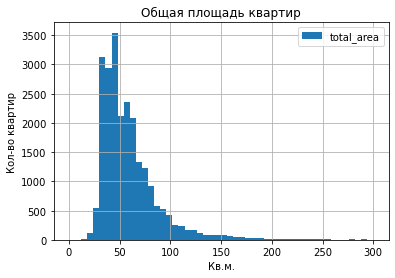

In [110]:
df['total_area'].hist(bins=50, range=(0, 300), legend=True)
plt.title('Общая площадь квартир')
plt.xlabel('Кв.м.')
plt.ylabel('Кол-во квартир')
plt.show()

- Средняя площадь квартир - 60 кв.м.
- Минимальная площадь - 12 кв.м.
- Максимальная - 900 кв.м.

Большинство квартир - от 25 до 100 квадратных метров.
Присутствуют единичные варианты свыше  200 квадратных метров.

#### Цена

Приводим значения в столбце last_price в млн. Возвращаем целочисленный тип данных.

In [111]:
df['last_price'] = df['last_price']/1000000

In [112]:
'Топ предложений квартир по цене'
df['last_price'].sort_values(ascending=False).head(10)

12971    763.0000
19540    420.0000
14706    401.3000
1436     330.0000
15651    300.0000
22831    289.2384
16461    245.0000
13749    240.0000
5893     230.0000
8900     190.8700
Name: last_price, dtype: float64

In [113]:
df['last_price'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

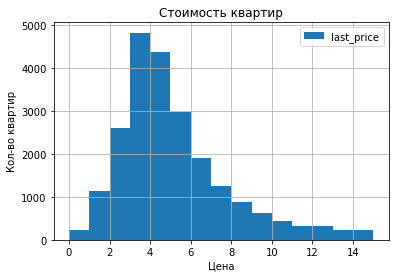

In [114]:
df['last_price'].hist(bins=15, range=(0,15), legend=True)
plt.title('Стоимость квартир')
plt.xlabel('Цена')
plt.ylabel('Кол-во квартир')
plt.show()

- Средняя стоимость квартир - 6.5 млн.руб.
- Минимальная стоимость - 1.2 млн.руб.
- Максимальная - 763 млн.руб.

Большинство квартир стоимостью - от 2 до 7 млн.руб.
Присутствуют эксклюзивные предложения.

#### Число комнат

In [115]:
'Топ предложений квартир по комнатам'
df['rooms'].sort_values(ascending=False).head(10)

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64

In [116]:
df['rooms'].describe()

count    23565.000000
mean         2.078888
std          1.066503
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

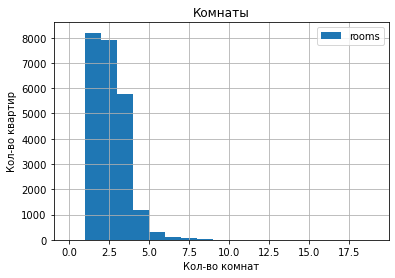

In [117]:
df['rooms'].hist(bins=df['rooms'].max(), range=(0,df['rooms'].max()), legend=True)
plt.title('Комнаты')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.show()

- Среднее количество комнат - 2 ед.
- Минимальное стоимость - 1 ед.
- Максимальное - 19.

Большинство квартир являются 1, 2 и 3 комнатными.
Есть небольшая доля 4 комнатных квартир.
Присутствуют эксклюзивные предложения.

#### Высота потолков

In [118]:
'Топ предложений квартир по высоте потолков'
df['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
5246      27.0
2158      27.0
5807      27.0
20478     27.0
22938     27.0
17857     27.0
Name: ceiling_height, dtype: float64

In [119]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.734243
std          1.011946
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

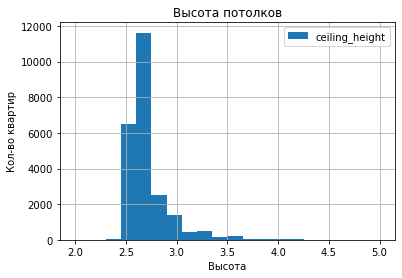

In [120]:
df['ceiling_height'].hist(bins=20, range=(2,5), legend=True)
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Кол-во квартир')
plt.show()

- Средняя высота потолков - 2.7 м.
- Минимальная - 2.2 м.
- Максимальная - 100 м.

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.

Отдельная категория – двухуровневые квартиры/апартаменты. В просторных помещениях потолок поднимают до 5 м, что позволяет делить пространство на две полноценные зоны.

Значения в 32 и 27 метров -  может быть ошибкой данных - реальная высота 3,2 и 2,7 метра.

Высота 100 метров - выброс.

### Изучение времени продаж квартир. Построение гистограмм. 

In [121]:
'Топ сроков нахождения в продаже квартир'
df['days_exposition'].sort_values(ascending=False).head(10)

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
20969    1512.0
6691     1512.0
14093    1497.0
15313    1489.0
19123    1485.0
11955    1484.0
Name: days_exposition, dtype: float64

In [122]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [123]:
df['days_exposition'].median()

95.0

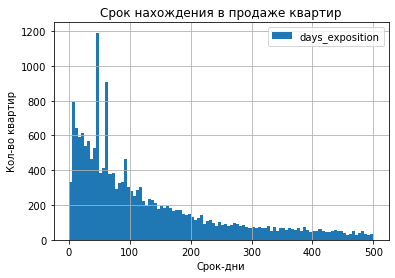

In [124]:
df['days_exposition'].hist(bins=100, range=(0, 500), legend=True)
plt.title('Срок нахождения в продаже квартир')
plt.xlabel('Срок-дни')
plt.ylabel('Кол-во квартир')
plt.show()

- Средний срок нахождения квартиры в продаже - 181 дней.
- Медианное время продажи - 95 дней.
- Минимальный срок - 1 день.
- Максимальный - 1580 дня (свыше 4 лет).

В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько лет.

Быстрыми продажами можно считать то что входит в первый квартиль - до 45 дней.
Долгими продажами можно считать то что входит в четвертый квартиль - свыше 231 дня.

### Редкие и выбивающиеся значения

In [125]:
df.shape[0]

23565

In [126]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,ratio_living_area,ratio_kitchen_area
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058,60.322824,2.078888,2.734243,10.675875,34.632970,5.878124,10.451372,0.593677,...,490.580448,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,0.565516,0.186632
std,5.681156,10.910935,35.657060,1.066503,1.011946,6.594823,22.473430,4.871485,5.899557,0.960660,...,341.572956,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,0.102370,0.070956
min,0.000000,0.012190,12.000000,1.000000,2.200000,1.000000,5.192308,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.037355,0.025381
25%,6.000000,3.400000,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.500000,0.135189
50%,9.000000,4.646000,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571429,0.171875
75%,14.000000,6.790000,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,11.800000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.633621,0.229167
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Исключаем выбросы (аномалии) - значения которые выходят за пределы 1,5 межквартильных размахов от ближайшего квартиля по столбцам:'kitchen_area', 'living_area', 'ceiling_height', 'rooms', 'last_price', 'days_exposition'.

In [127]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
list_features = ['kitchen_area', 'living_area', 'last_price', 'days_exposition', 'total_area']
for col in list_features:
    df[col] = quartile_range(df, col)

Заменим вещественный тип данных на целочисленный 'rooms'.

In [128]:
df['rooms'] = df['rooms'].fillna(0).astype(int)

In [129]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,ratio_living_area,ratio_kitchen_area
count,23565.000000,21519.000000,22326.000000,23565.000000,23565.000000,23565.000000,22699.000000,23565.000000,22180.000000,23565.000000,...,8030.000000,23565.000000,9036.000000,18721.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115,54.319704,2.078888,2.734243,10.675875,31.589098,5.878124,9.360394,0.593677,...,490.580448,0.589900,518.289509,128.299343,9.940584e+04,2.567367,6.401570,2017.371016,0.565516,0.186632
std,5.681156,2.215774,19.331030,1.066503,1.011946,6.594823,13.893468,4.871485,3.030597,0.960660,...,341.572956,0.883966,278.009558,121.064671,5.038943e+04,1.788279,3.492948,1.037393,0.102370,0.070956
min,0.000000,0.012190,12.000000,1.000000,2.200000,1.000000,5.192308,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.037355,0.025381
25%,6.000000,3.300000,39.400000,1.000000,2.550000,5.000000,18.400000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,41.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.500000,0.135189
50%,9.000000,4.400000,50.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.000000,85.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571429,0.171875
75%,14.000000,5.999999,65.500000,3.000000,2.700000,16.000000,41.000000,8.000000,11.000000,1.000000,...,612.000000,1.000000,730.000000,182.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.633621,0.229167
max,50.000000,11.866860,114.200000,19.000000,100.000000,60.000000,77.800000,33.000000,18.950000,5.000000,...,3190.000000,3.000000,1344.000000,509.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


In [130]:
df.shape[0]

23565

Значения стали лучше и адекватнее.

По столбцам 'ceiling_height' и 'rooms' производим отдельный расчет. Ограничиваем комнаты 7-ю. Высоту потолков 5-ю м.

In [131]:
df_new = df.query('rooms <= 7 & ceiling_height <= 5 ')

In [132]:
df_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,ratio_living_area,ratio_kitchen_area
count,23494.000000,21485.000000,22291.000000,23494.000000,23494.000000,23494.000000,22664.000000,23494.000000,22132.000000,23494.000000,...,7989.000000,23494.000000,9004.000000,18676.000000,2.349400e+04,23494.000000,23494.000000,23494.000000,23494.000000,23494.000000
mean,9.879076,4.837969,54.323306,2.068230,2.702745,10.685920,31.588305,5.881033,9.359612,0.593258,...,490.729628,0.589087,518.766770,128.231848,9.929108e+04,2.567762,6.403252,2017.371457,0.565325,0.186786
std,5.678130,2.215873,19.332769,1.022407,0.219499,6.593981,13.893183,4.872121,3.029662,0.959734,...,341.808410,0.883140,278.077148,120.983421,4.985099e+04,1.788783,3.492734,1.036870,0.102259,0.070914
min,0.000000,0.012190,12.000000,1.000000,2.200000,1.000000,5.192308,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.037355,0.025381
25%,6.000000,3.300000,39.400000,1.000000,2.550000,5.000000,18.400000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,41.000000,7.663185e+04,1.000000,3.000000,2017.000000,0.500000,0.135354
50%,9.000000,4.400000,50.100000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.000000,85.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571429,0.171965
75%,14.000000,6.000000,65.500000,3.000000,2.700000,16.000000,41.000000,8.000000,11.000000,1.000000,...,612.000000,1.000000,732.000000,182.000000,1.141963e+05,4.000000,10.000000,2018.000000,0.633484,0.229167
max,50.000000,11.866860,114.200000,7.000000,5.000000,60.000000,77.800000,33.000000,18.950000,5.000000,...,3190.000000,3.000000,1344.000000,509.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


In [133]:
df_new.shape[0]

23494

In [134]:
df_new.shape[0] / df.shape[0]

0.9969870570761723

### Факторы, влияющие на стоимость квартиры

#### Влияние общей площади квартиры

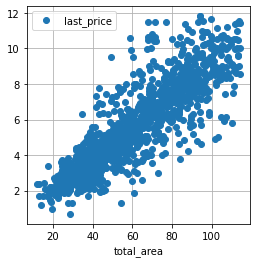

In [135]:
df_new.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(4, 4))
plt.show()

In [136]:
df_new.pivot_table(index='floor', values=['total_area', 'last_price']).corr()

,last_price,total_area
last_price,1.000000,0.905383
total_area,0.905383,1.000000


#### Влияние количества комнат

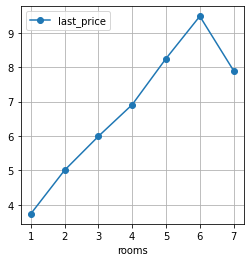

In [137]:
df_new.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(4, 4))
plt.show()

In [138]:
df_new.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr()

,last_price,rooms
last_price,1.000000,0.526796
rooms,0.526796,1.000000


#### Влияние удаленнности от центра

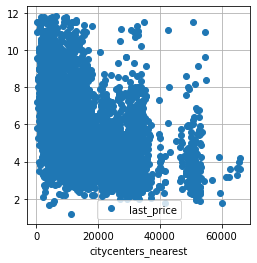

In [139]:
df_new.pivot_table(index='citycenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(4, 4))
plt.show()

In [140]:
df_new.pivot_table(index='floor', values=['citycenters_nearest', 'last_price']).corr()

,citycenters_nearest,last_price
citycenters_nearest,1.000000,0.711801
last_price,0.711801,1.000000


#### Влияние этажности

In [141]:
def group_floor(row):
    if row['floor'] == 1:
        return 'первый'
    
    if row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'
df_new['group_floor'] = df_new.apply(group_floor, axis=1)

In [142]:
df_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,apartment_floors,ratio_living_area,ratio_kitchen_area,group_floor
0,20,NaN,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,другой
1,7,3.350,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,первый
2,10,5.196,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,574.0,NaN,92785.714286,3,8,2015,другой,0.612500,0.148214,другой
3,0,NaN,NaN,2015-07-24,3,2.700,14,NaN,9,False,...,234.0,424.0,408176.100629,4,7,2015,другой,0.597484,0.094340,другой
4,2,10.000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,другой


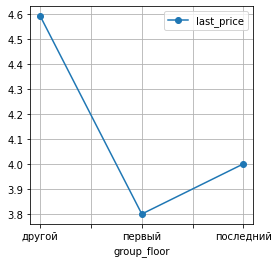

In [143]:
df_new.pivot_table(index='group_floor', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(4, 4))
plt.show()

In [144]:
from numpy import median

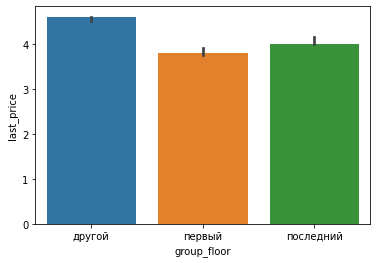

In [145]:
sns.barplot(x='group_floor', y='last_price', data=df_new, estimator=median)
plt.show()

#### Зависимость от дня размещения

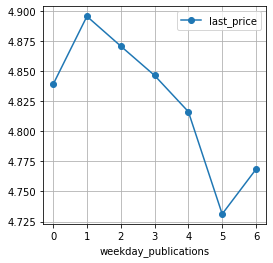

In [146]:
df_new.pivot_table(index='weekday_publications', values='last_price').plot(grid=True, style='o-', figsize=(4, 4))
plt.show()

#### Зависимость от месяца размещения

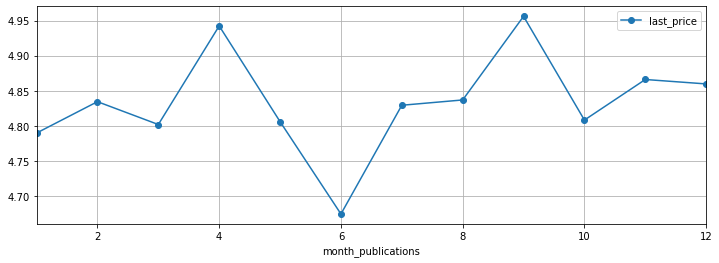

In [147]:
df_new.pivot_table(index='month_publications', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(12, 4))
plt.show()

#### Зависимость от года размещения

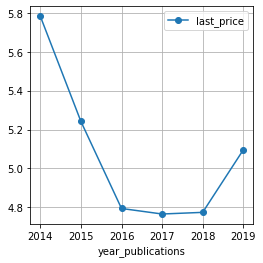

In [148]:
df_new.pivot_table(index='year_publications', values='last_price').plot(grid=True, style='o-', figsize=(4, 4))
plt.show()

#### Результат

Чем больше площадь, тем выше стоимость. Высокая корреляция показателей.

Число комнат влияет на цену. Больше комнат - больше цена. Корреляция ниже, чем у площади. 

Самые дорогие варианты квартир находятся в центре города. В центре также есть дешёвые варианты.

Квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
Дороже всего квартиры, продающиеся с декабря, дешевле всего - с октября.
Стоимость квартир сжижается с 2014 по 2018 год. Причина санкции, рост ставки рефинансирования и т.д. С 2018 стабилизация и рост. 

### 10 населённых пунктов с наибольшим числом объявлений

In [149]:
median_price_per_sqm = df_new.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'mean'])
median_price_per_sqm.columns = ['count', 'mean']
median_price_per_sqm.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15597,114708.332729
посёлок Мурино,518,85645.903323
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,337,75333.295801
посёлок Парголово,327,90175.913458
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


Самая высокая цена в Санкт-Петербург, а сама низкая Выборг.

### Анализ расположения квартир от центра

Создаем столбец с расстоянием до центра в километра. Округляем до целых значений.

In [150]:
df_new['center_km'] = df_new['citycenters_nearest'] / 1000
df_new['center_km'] = df_new['center_km'].fillna(0).astype(int)

In [151]:
df_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_sqm,weekday_publications,month_publications,year_publications,apartment_floors,ratio_living_area,ratio_kitchen_area,group_floor,center_km
0,20,NaN,108.0,2019-03-07,3,2.700,16,51.0,8,False,...,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,другой,16
1,7,3.350,40.4,2018-12-04,1,2.615,11,18.6,1,False,...,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,первый,18
2,10,5.196,56.0,2015-08-20,2,2.700,5,34.3,4,False,...,NaN,92785.714286,3,8,2015,другой,0.612500,0.148214,другой,13
3,0,NaN,NaN,2015-07-24,3,2.700,14,NaN,9,False,...,424.0,408176.100629,4,7,2015,другой,0.597484,0.094340,другой,6
4,2,10.000,100.0,2018-06-19,2,3.030,14,32.0,13,False,...,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,другой,8


Построим график зависимости стоимости от удалённости от центр, с учетом средней цены для каждого километра.

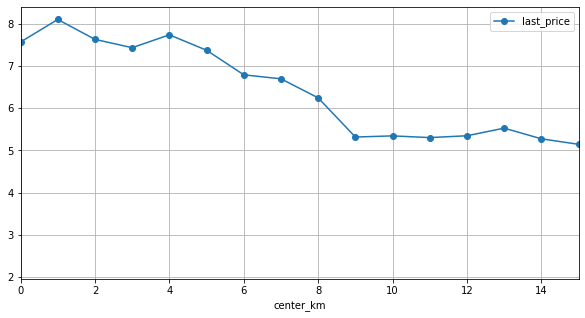

In [152]:
(df_new.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price',aggfunc='mean')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5)))
plt.show()

На 7 км средняя цена на квартиры резко снижается. Будем считать центром Санкт-Петербурга окружность радиусом 7 км.

In [153]:
spb_center = df_new.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

Проанализируем центр Санкт-Петербурга по следующим параметрам: площадь, цена, число комнат, высота потолков.

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.704120  0.743010        0.211852
last_price        0.704120    1.000000  0.481403        0.202141
rooms             0.743010    0.481403  1.000000        0.264236
ceiling_height    0.211852    0.202141  0.264236        1.000000


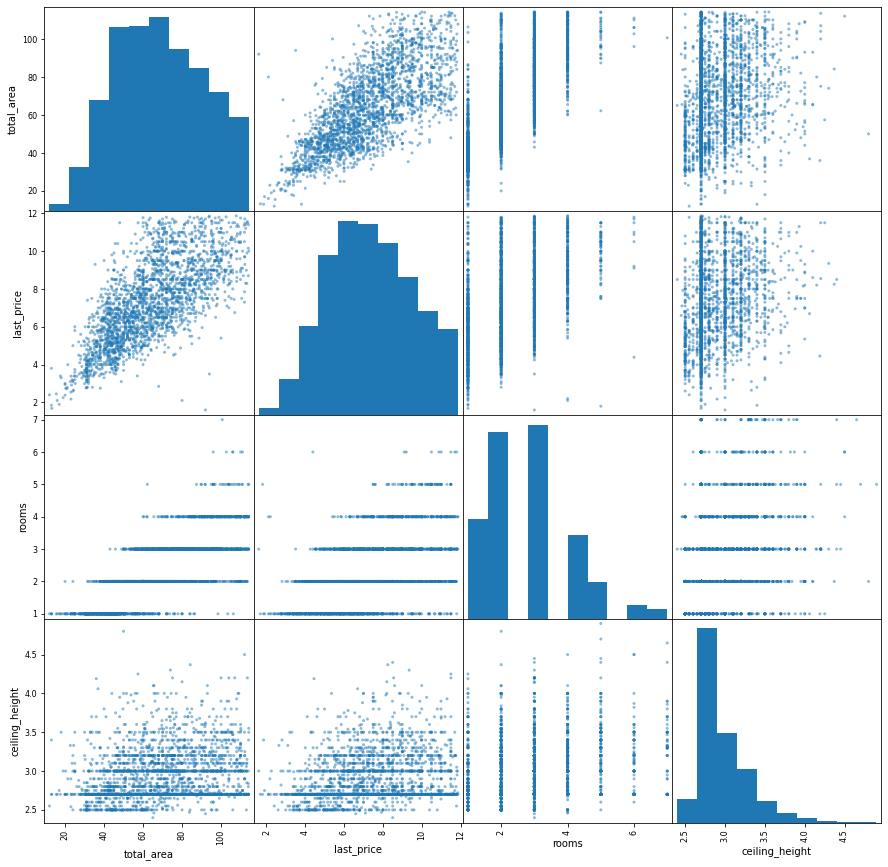

In [154]:
print(spb_center[['total_area','last_price','rooms','ceiling_height']].corr())
pd.plotting.scatter_matrix(spb_center[['total_area','last_price','rooms','ceiling_height']],figsize=(15,15))
plt.show()

Выделим дополнительные факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [155]:
def frame_plot(frame,list_of_columns):
    for column in list_of_columns:
        frame[column].hist(bins = 15,figsize = (5,5))
        plt.title(column)
        plt.show()

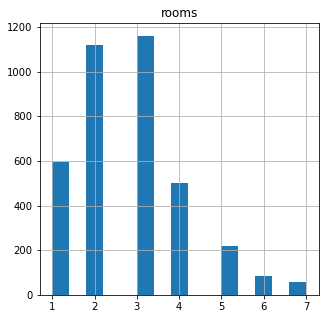

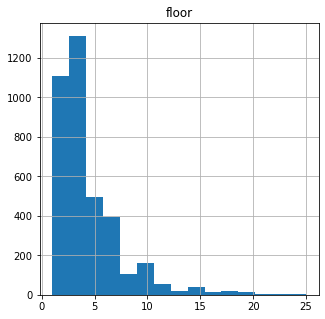

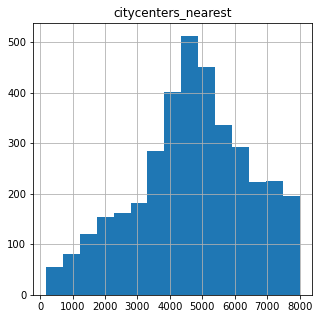

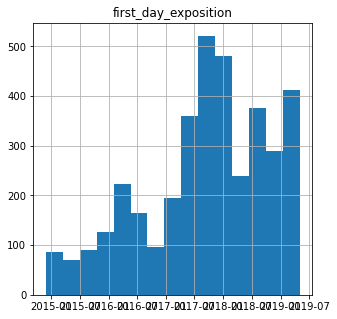

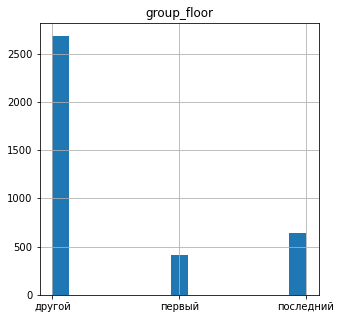

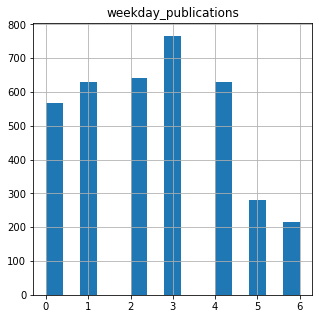

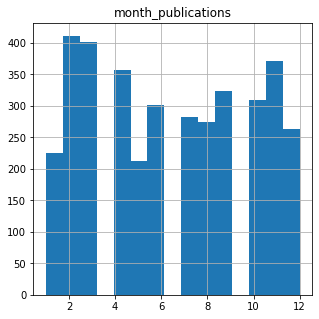

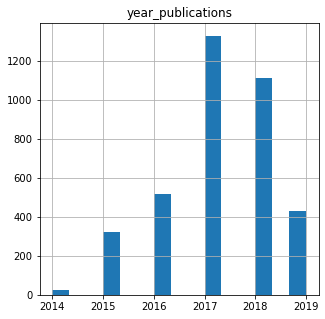

In [156]:
list_of_columns_spb = ['rooms'
                       ,'floor'
                       ,'citycenters_nearest'
                       ,'first_day_exposition'
                       ,'group_floor'
                       ,'weekday_publications'
                       ,'month_publications'
                       ,'year_publications']
frame_plot(spb_center,list_of_columns_spb)

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу. 
Максимальная зависимость от площади, минимальная от высоты потолков.
В центре есть очень дорогие однокомнатные квартиры. 

Стоимость повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города. 

В продаже в основном находятся квартиры расположенные не на 1-ом и не на последнем этаже. Пик публикаций объявлений приходится на 2017-2018 гг. с последующим падением. Публикации осуществлялись преимущественно в рабочие дни. Ежемесячные пики приходятся на февраль - март и ноябрь.

## Общий вывод

* Средняя площадь квартир - 60 кв.м.
* Минимальная площадь - 12 кв.м.
* Максимальная - 900 кв.м.
Большинство квартир - от 25 до 100 квадратных метров. Присутствуют единичные варианты свыше 200 квадратных метров.


* Средняя стоимость квартир - 6.5 млн.руб.
* Минимальная стоимость - 1.2 млн.руб.
* Максимальная - 763 млн.руб.
Большинство квартир стоимостью - от 2 до 7 млн.руб. Присутствуют эксклюзивные предложения.

* Среднее количество комнат - 2 ед.
* Минимальное стоимость - 1 ед.
* Максимальное - 19.
Большинство квартир являются 1, 2 и 3 комнатными. Есть небольшая доля 4 комнатных квартир. Присутствуют эксклюзивные предложения.

* Средняя высота потолков - 2.7 м.
* Минимальная - 2.2 м.
* Максимальная - 100 м.
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.
Отдельная категория – двухуровневые квартиры/апартаменты. В просторных помещениях потолок поднимают до 5 м, что позволяет делить пространство на две полноценные зоны.

* Средний срок нахождения квартиры в продаже - 181 дней.
* Медианное время продажи - 95 дней.
* Минимальный срок - 1 день.
* Максимальный - 1580 дня (свыше 4 лет).
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько лет.

Дороже всего квадратный метр в Санкт-Петербурге - 114708 Дешевле всего квадратный метр в Выборге - 58142

Число комнат влияет на цену. Больше комнат - больше цена. Корреляция ниже, чем у площади.
Самые дорогие варианты квартир находятся в центре города. В центре также есть дешёвые варианты.
Квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье. Дороже всего квартиры, продающиеся с декабря, дешевле всего - с октября. Стоимость квартир сжижается с 2014 по 2018 год. Причина санкции, рост ставки рефинансирования и т.д. С 2018 стабилизация и рост.

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу. Максимальная зависимость от площади, минимальная от высоты потолков. В центре есть очень дорогие однокомнатные квартиры. Стоимость повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города. В продаже в основном находятся квартиры расположенные не на 1-ом и не на последнем этаже. Пик публикаций объявлений приходится на 2017-2018 гг. с последующим падением. Публикации осуществлялись преимущественно в рабочие дни. Ежемесячные пики приходятся на февраль - март и ноябрь.
